# Tensegrity structures

### Loading libraries and files

In [44]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

#for plotting
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.dpi'] = 300

### Test example with only cables, fixed nodes

##### Initializtion of the structure

In [45]:
#Making the structure
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [-5,  8,    0],
                  [ 3, -4,    3],
                  [ 1,  3,   -2],
                  [ 3, -3,    0]]).astype(np.float64)

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

struct1 = CTS.CableTensegrityStruct(num_of_fixed_nodes,nodes, masses,cables, k)

##### Applying BFGS

In [46]:
#BFGS
struct1_BFGS = copy.deepcopy(struct1)
norms1 = opt.BFGS(struct1_BFGS, return_norms=True)

BFGS used 39 iterations


##### Plotting results

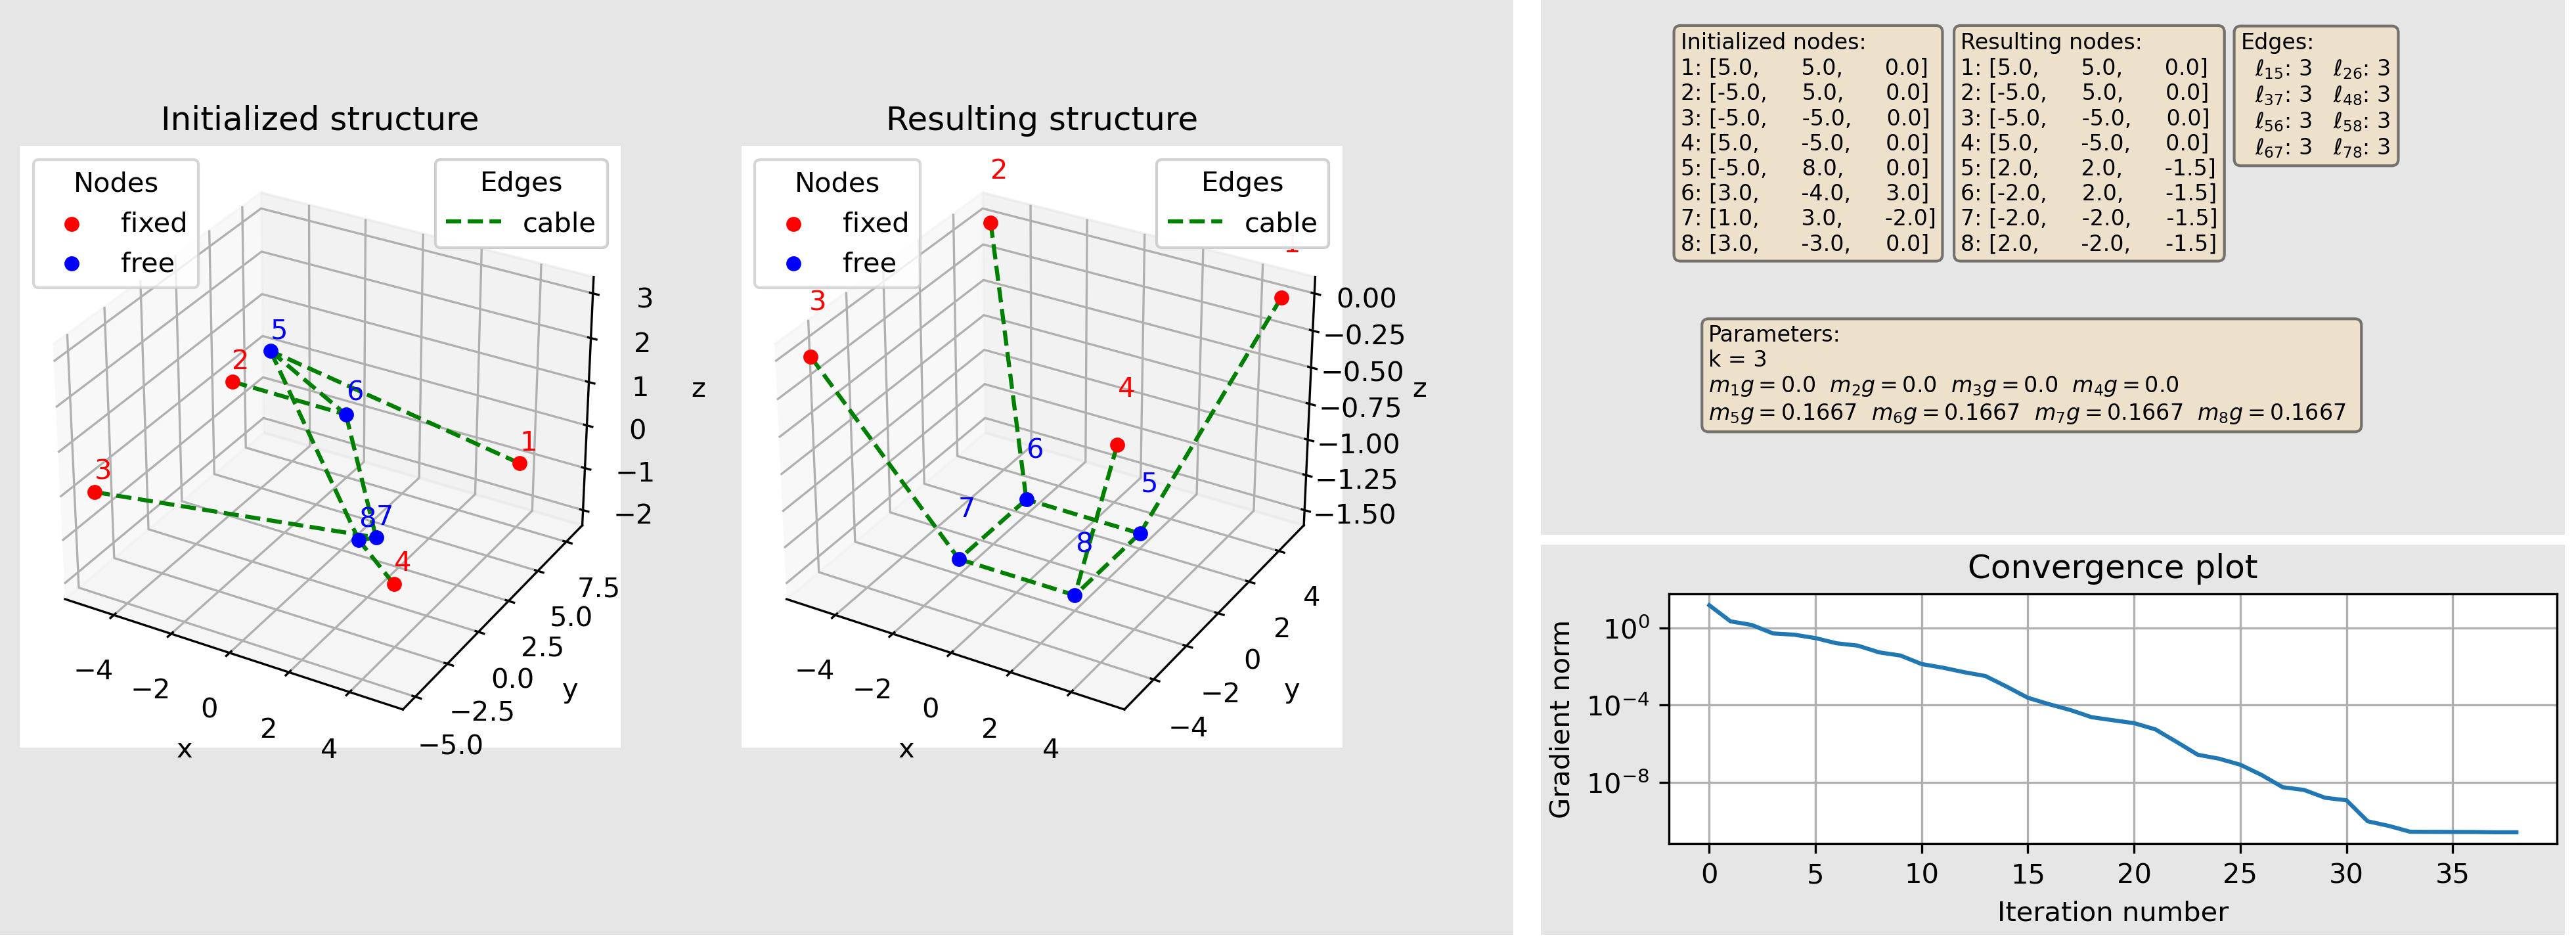

In [47]:
#Plot
plotting.main_plot(struct1, struct1_BFGS, norms1, filename="struct1.png",many_params=True)

### Test example with cables and bars, fixed nodes

##### Initialization of the structure

In [48]:
#Making the structure
num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [5,  5, 5],
                  [-5,  5, 5],
                  [-5,  -5, 6],
                  [5,  -5, 7]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[]])

c=1
k=0.1
bar_density = 1e-6

struct2 = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

##### Applying BFGS

In [49]:
#BFGS
struct2_BFGS = copy.deepcopy(struct2)
norms2 = opt.BFGS(struct2_BFGS, return_norms=True)

BFGS used 306 iterations


##### Plotting results

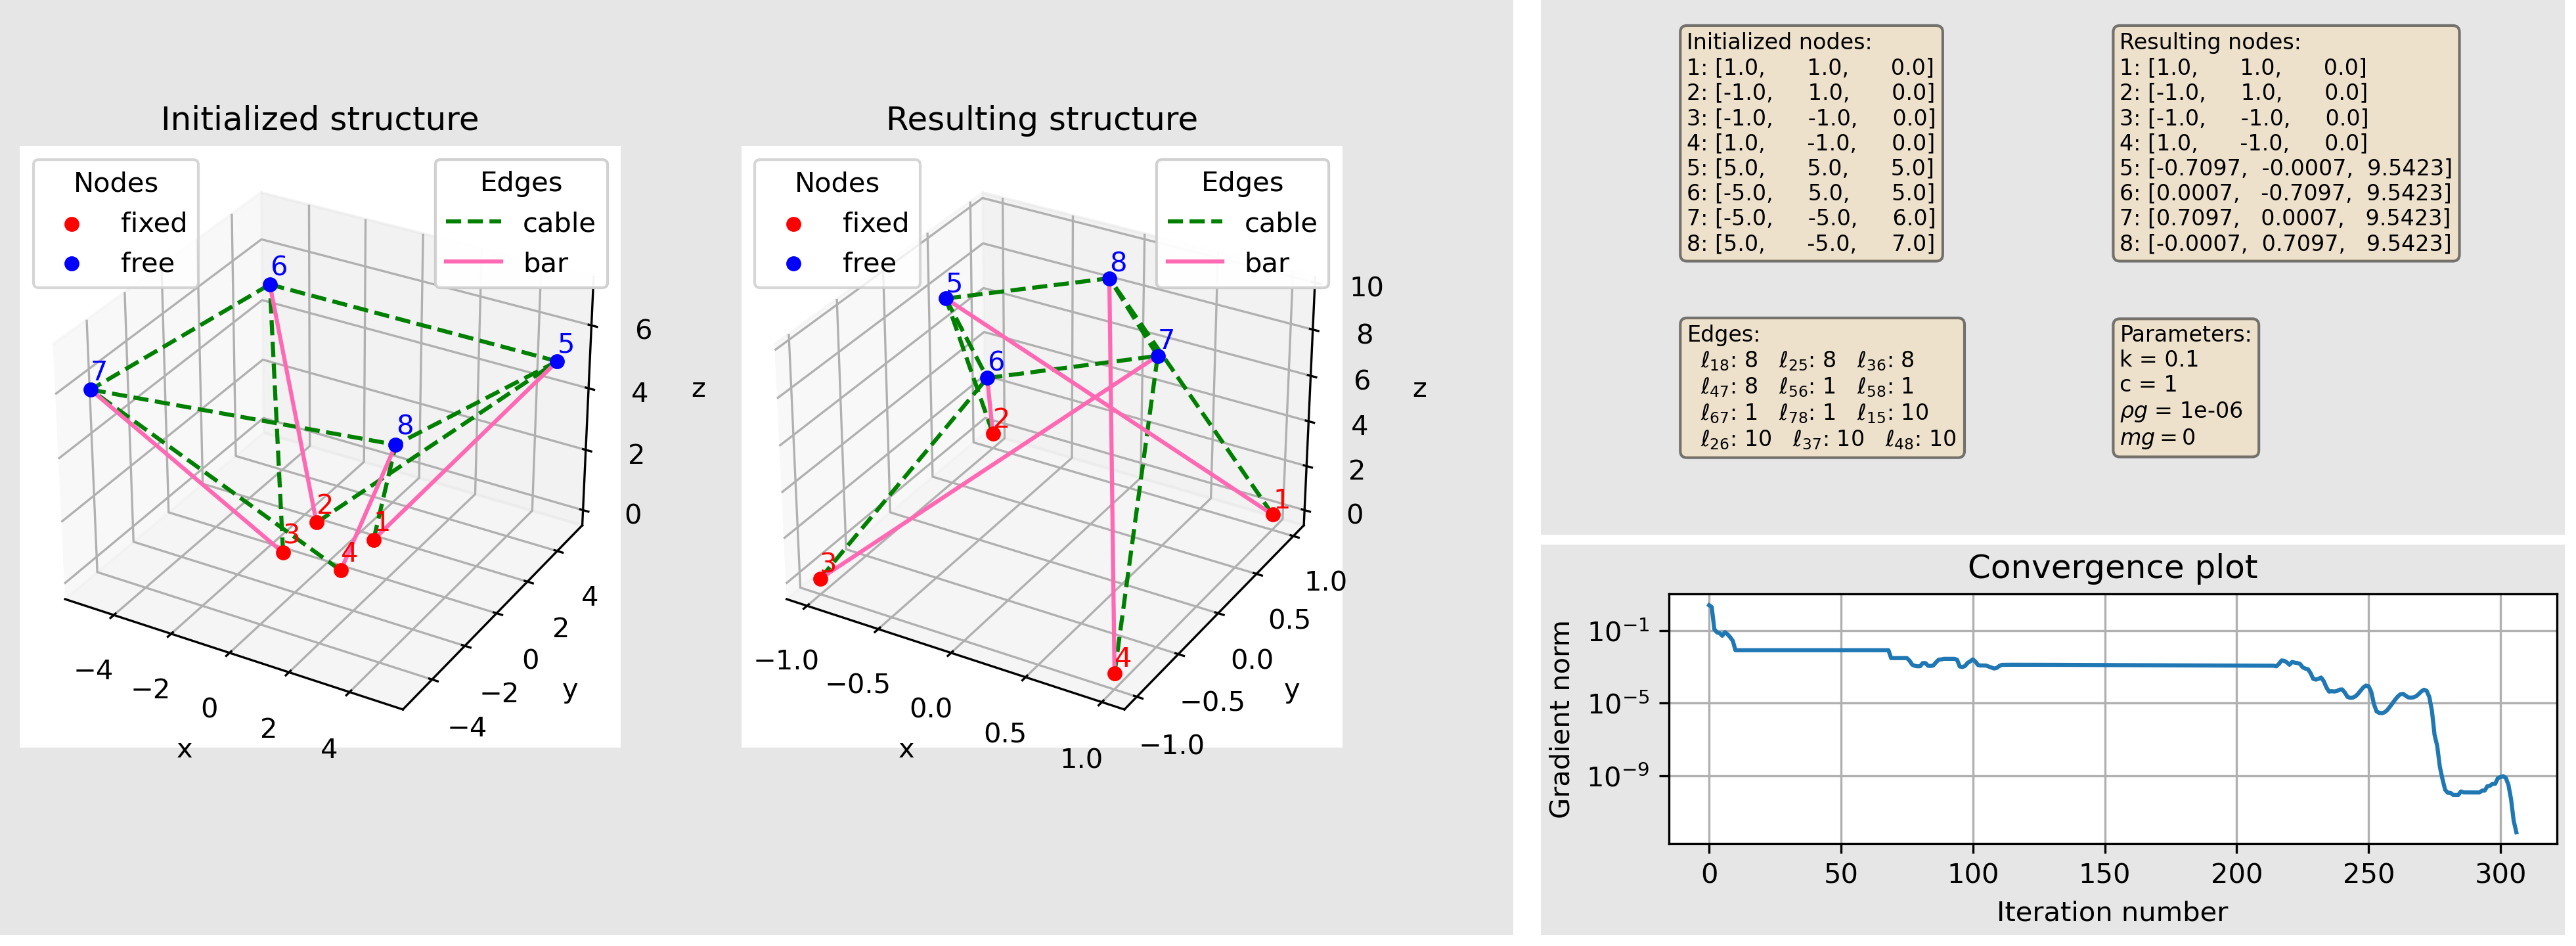

In [50]:
#Plot
plotting.main_plot(struct2, struct2_BFGS, norms2, filename="struct2.png")

### Test example of a free standing structure

##### Initialization of the structure

In [51]:
#Making the structure
nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 5],
                  [-1, -1, 0],
                  [ 1, -1, 3],
                  [ 5,  5, 10],
                  [-5,  5, 10],
                  [-5, -5, 10],
                  [ 5, -5, 10]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[]])

c=1
k=0.1
bar_density = 1e-5

struct3 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)

##### Applying quadratic penalty method with BFGS

In [52]:
#Quadratic penalty method with BFGS
struct3_QPM = copy.deepcopy(struct3)
tolerances=np.array([1e-7, 1e-9, 1e-11])
norms3 = opt.quadratic_penalty_method(struct3_QPM, 1000, tolerances, maxiter_BFGS=500, return_norms = True)

BFGS used 500 iterations
BFGS used 500 iterations
BFGS used 433 iterations


##### Plotting Results

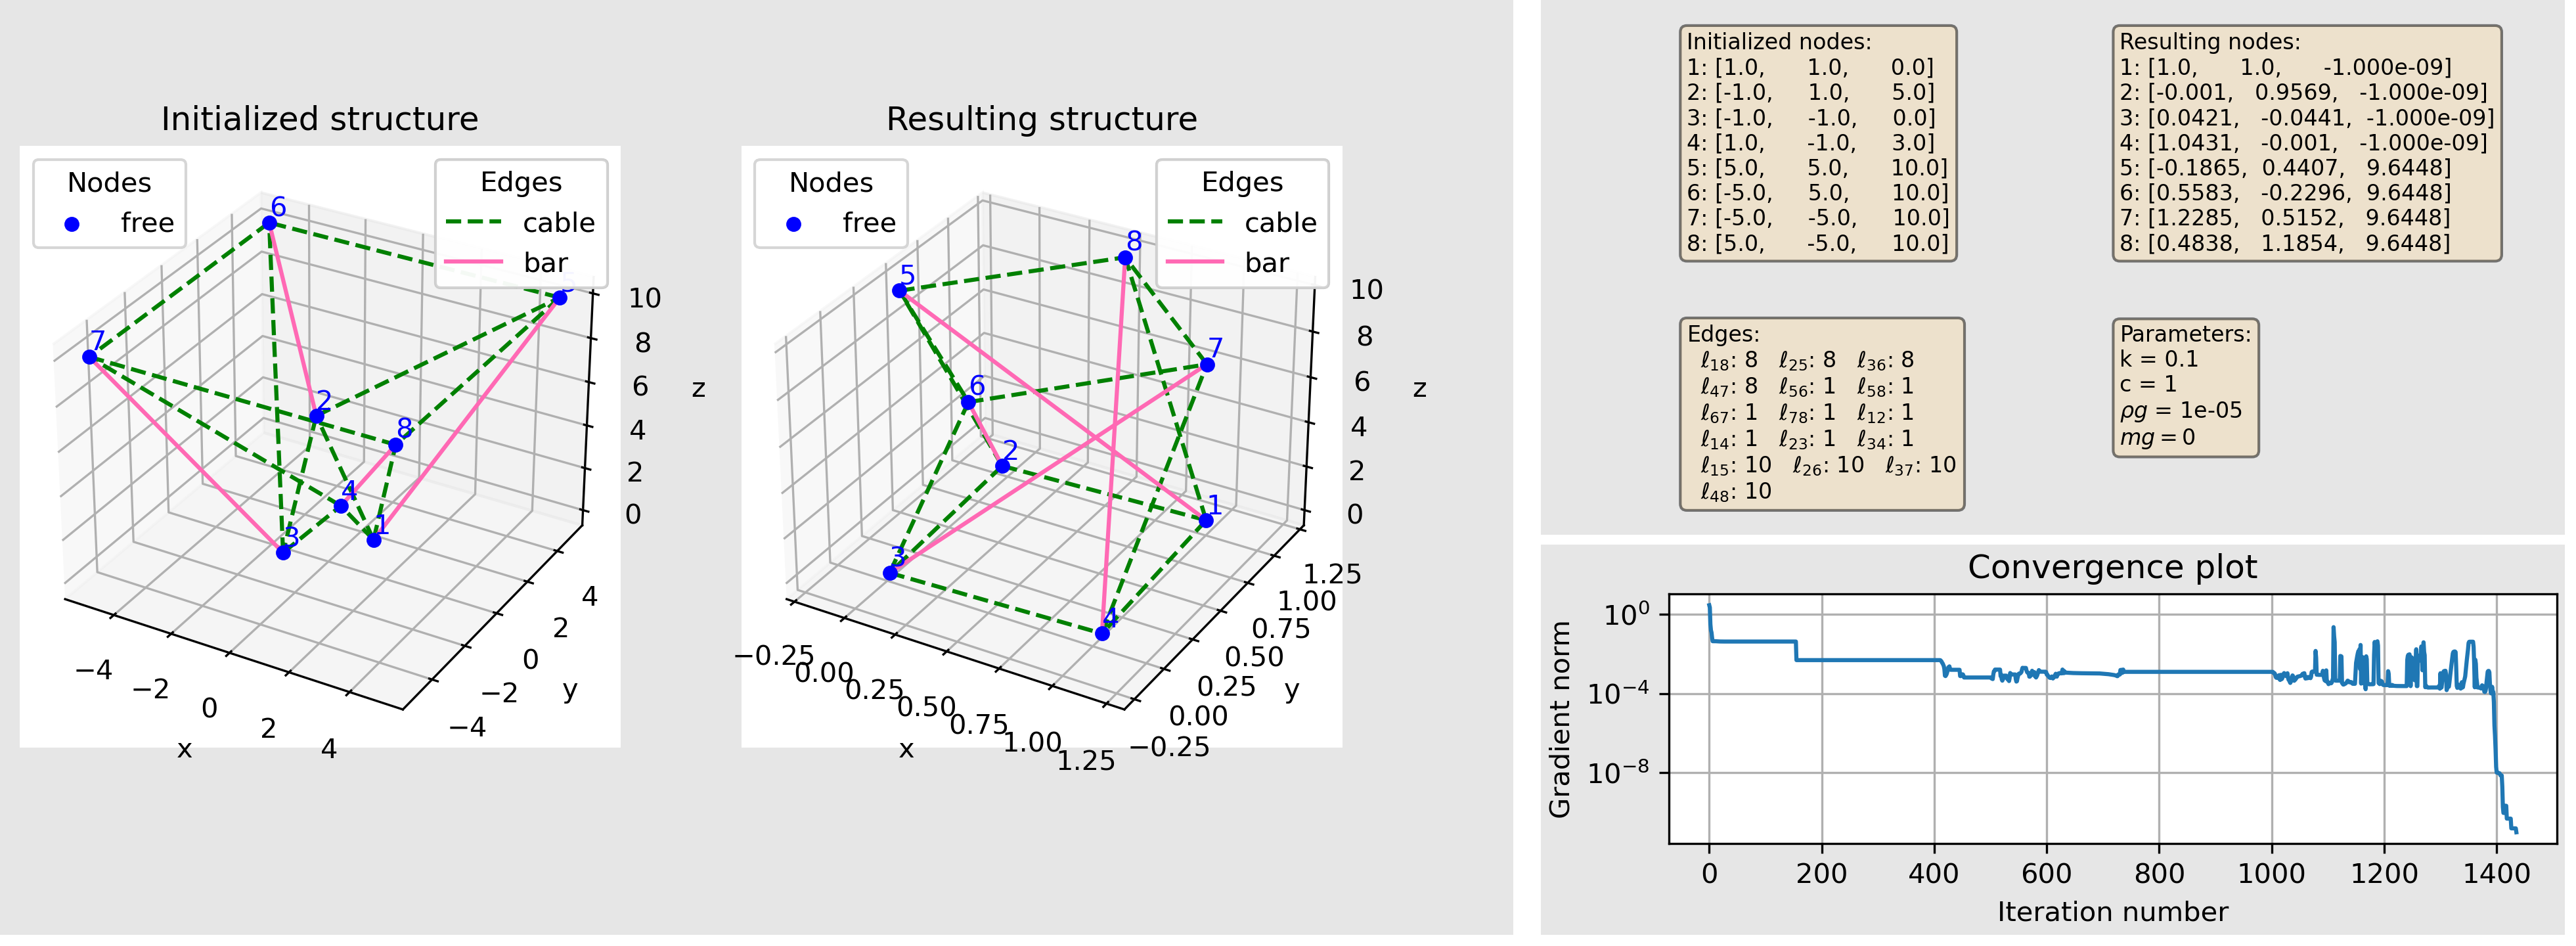

In [53]:
plotting.main_plot(struct3, struct3_QPM, norms3, filename="struct3.png")

### Another example of a free standing structure

##### Initialization of the structure


In [54]:
nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [ 5,  5, 10],
                  [-5,  5, 10],
                  [-5, -5, 10],
                  [ 5, -5, 10],
                  [0, 0, 15],
                  [0, 0, 2]
                  ]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1.5],
                   [0, 3, 1.5],
                   [1, 2, 1.5],
                   [2, 3, 1.5], 
                   [4, 9, 2],
                   [5, 9, 2],
                   [6, 9, 2],
                   [7, 9, 2]
                   ])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10],
                 [4, 8, 5],
                 [5, 8, 5],
                 [6, 8, 5],
                 [7, 8, 5]])

masses = np.array([])

c=1
k=1
bar_density = 1e-4

struct4 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)



##### Applying Quadratic Penalty Method with BFGS

In [55]:
#Quadratic penalty method with BFGS
struct4_QPM = copy.deepcopy(struct4)
tolerances=np.array([1e-7, 1e-9, 1e-11])
norms4 = opt.quadratic_penalty_method(struct4_QPM, 1000, tolerances, maxiter_BFGS=1000, return_norms = True)

BFGS used 1000 iterations
BFGS used 1000 iterations
BFGS used 1000 iterations


##### Plotting

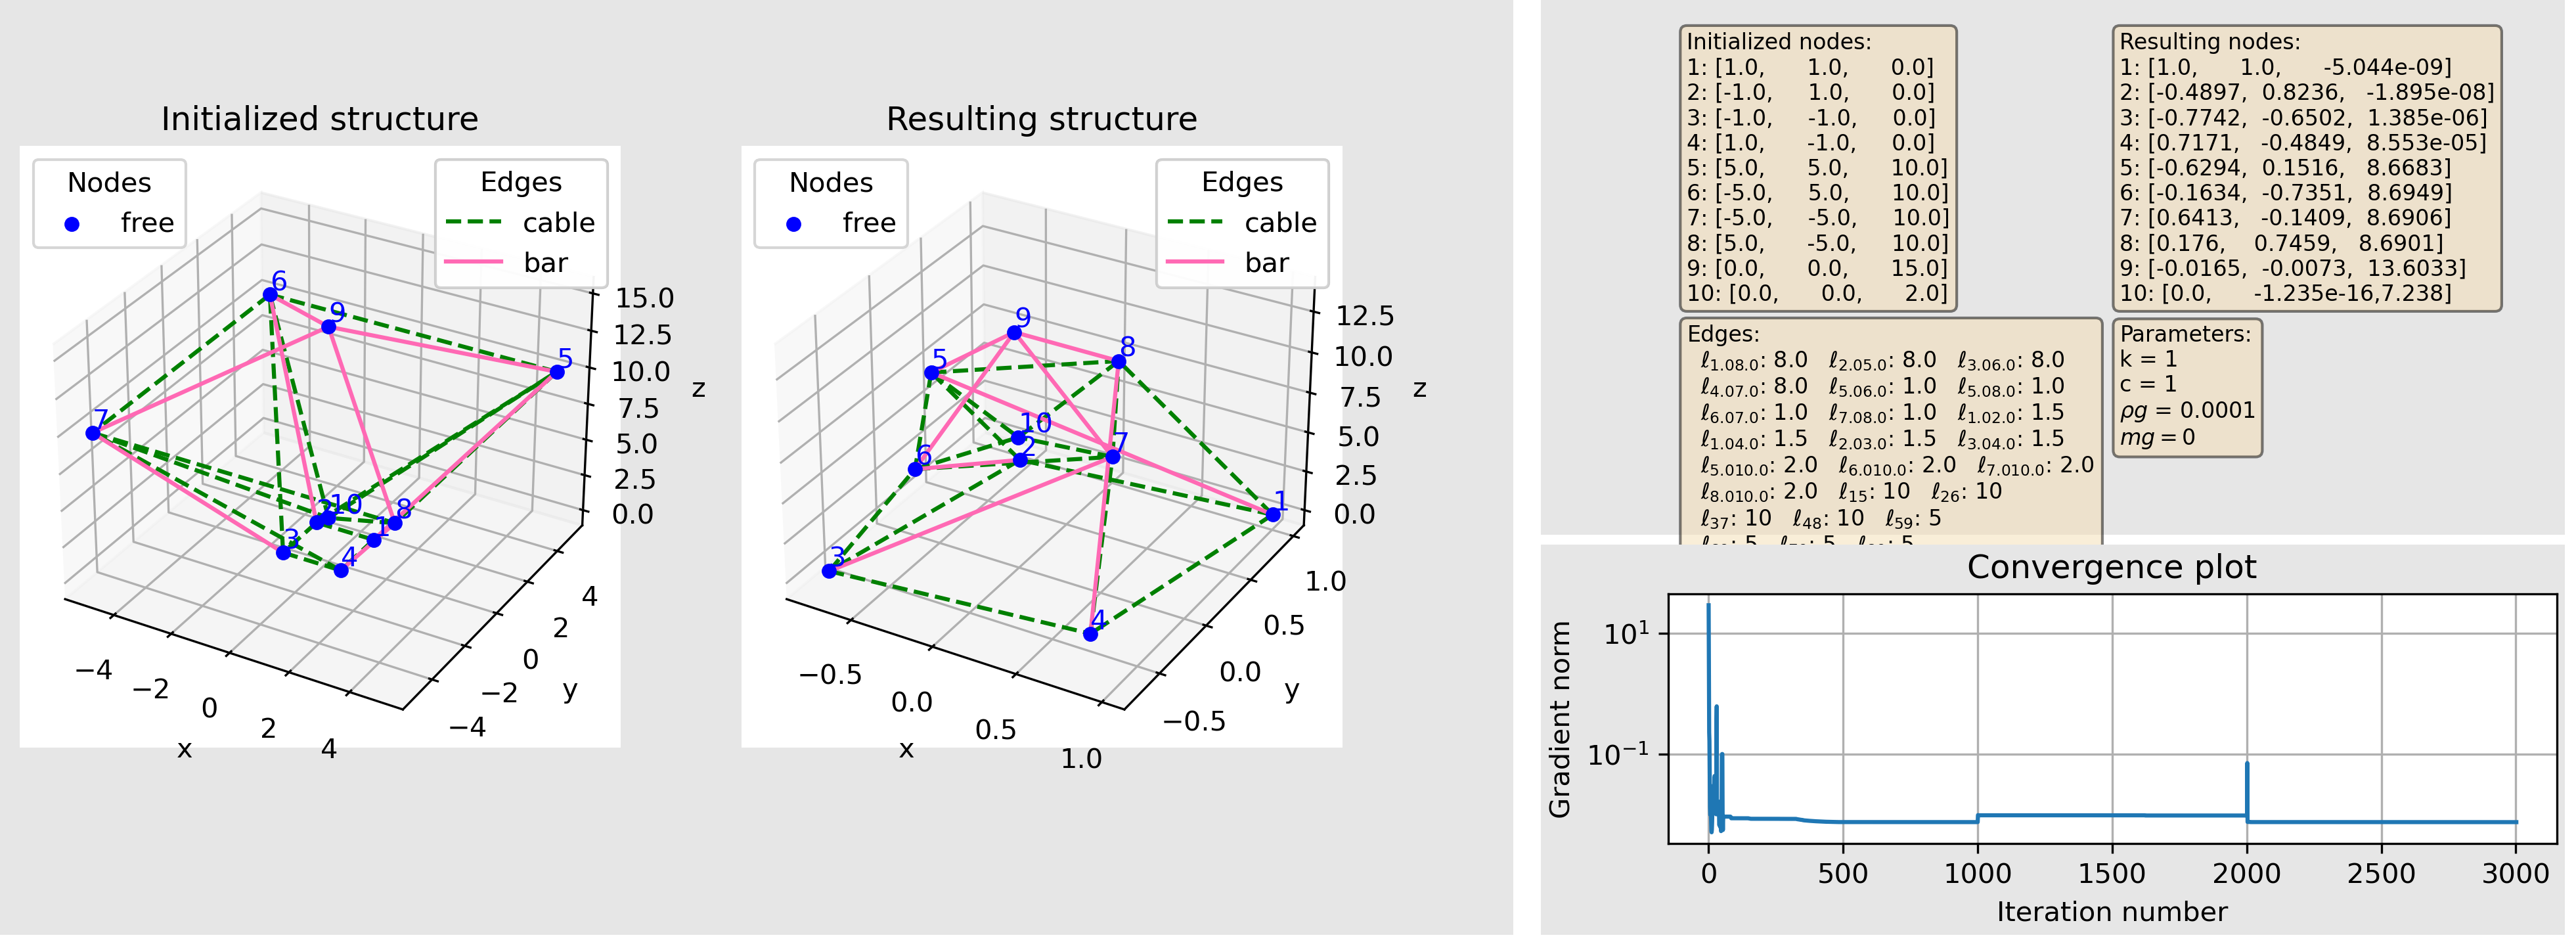

In [63]:
plotting.main_plot(struct4, struct4_QPM, norms4, filename="struct4.png")

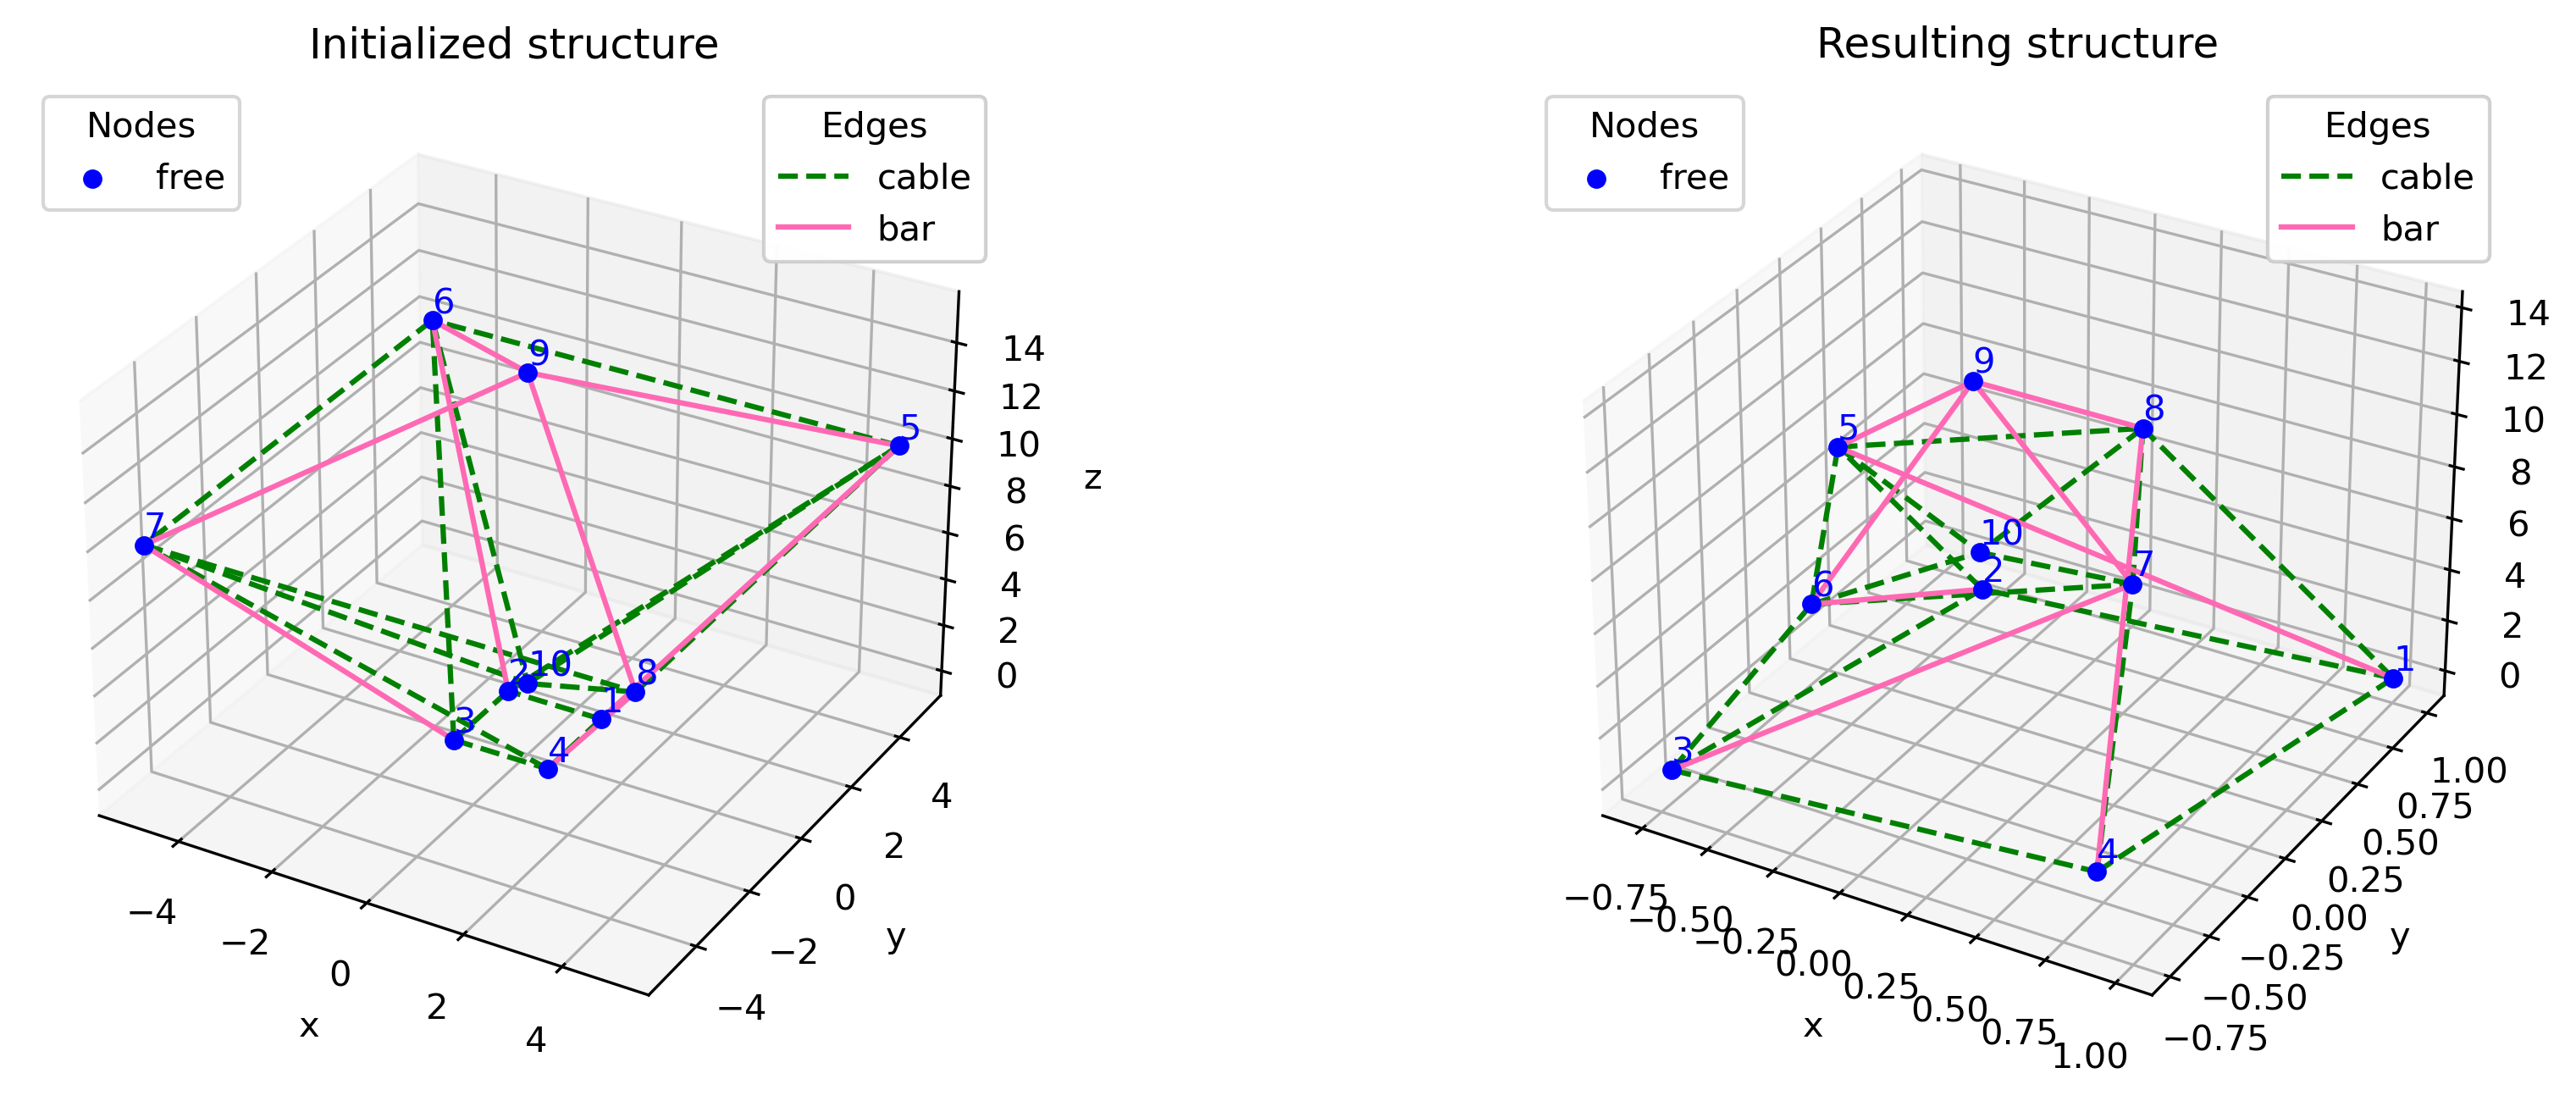

In [61]:
fig = plt.figure(figsize=(14,5))
axs = [0]*2 #to be filled with axes
gs = GridSpec(1, 2) #gridspec for tensegrity structure plot
axs[0] = fig.add_subplot(gs[0,0],projection='3d') #adding 3d axes
axs[1] = fig.add_subplot(gs[0,1],projection='3d')
plotting.plot_structure(struct4, axs[0], title="Initialized structure")
plotting.plot_structure(struct4_QPM, axs[1], title="Resulting structure")
plt.show()


##### Comments

From our physical intuition, the final structure above seems somewhat stable, but not as stable as the structures we have previously considered. We also note from the convergence plot that we are nowhere near the desired size for the norm of the gradient. A possible reason for this might be that we have had to choose the parameters for the cables and bars that connect these additional nodes to our previous structure, and this was non-trivial. After some rounds of trial and error we have landed on this initialization, but had we had more time, we could possibly have found a more well-posed problem to test on.